# Homework 1
## BIOMEDE 241, Winter 2026

### **Submission Instructions**
Note: Incorrect submissions may not be graded. Please read these instructions carefully to receive credit for your work.
After completed, use File > Download to .ipynb on this file and upload the file to Canvas.

To access the dataset in Problem 5B, download the .csv file from the Canvas assignment and put it in the same "Colab Notebooks" folder in your google drive (where your HW1 notebooks lives).

In [1]:
# TODO: Access your path for google drive through google colab.
# #Mount your drive here. Do not separate the steps, keep them all together.
# #IMPORTANT: Before your turn in, please COMMENT THIS SECTION OUT
# #Sets "Colab Notebooks" in your Google Drive to be the working directory
# import os
# from google.colab import drive
# drive.mount('/content/drive')
# %cd /content/drive/My\ Drive/Colab\ Notebooks/
# #os.listdir()

### `Note:` This assignment was completed using a local Jupyter Notebook environment in VS Code rather than Google Colab; Colab-specific setup cells were therefore omitted.

### **Problem 1: Elementary row operations**
Define the following matrix in Python using the numpy array command:

```
A = [[2,  1, -2],
     [-1, 2, 3],
     [1,  0, 2]]
```
Apply the following elementary row operations to A. The operations are sequential, i.e. the output from one operation is the input to the next.
1. Multiply the 1st row by 1/2
2. Subtract the 1st row from the 2nd row
3. Add the 2nd row to the 3rd row
4. Swap the 1st and 2nd rows
5. Subtract 2 times the 1st row from the 3rd row
6. Multiply the 2nd row by -1
7. Add the 2nd row to the 1st row
8. Add 4 times the 3rd row to the 2nd row

Show your final output. Is it correct? What answer did you get when you tried this via pen and paper?



In [2]:
import numpy as np

#Code here
A = np.array([[2, 1, -2], [-1, 2, 3], [1, 0, 2]])

A[0,:] = (1/2)*A[0,:]
A[1,:] = A[1,:] - A[0,:]
A[2,:] = A[1,:] + A[2,:]
A[[0, 1], :] = A[[1, 0], :]
A[2,:] = A[2,:] - 2*A[0,:]
A[1,:] = (-1)*A[1,:]
A[0,:] = A[0,:] + A[1,:]
A[1,:] = A[1,:] + 4*A[2,:]
print(A)

[[-3  2  5]
 [11 -8 -7]
 [ 3 -2 -2]]


### I got the same answer on paper:
![HW1-P1](/Users/alexahitov/bme241/homework/HW1/HW1-P1.jpeg)

### **Problem 2: Building Matrices**
Given the following arrays (Run the following code segment):

In [3]:
x = np.array([5, 15, 25, 35])
y = np.array([3, 1, 0, 5])
B = np.array([[6, 0, 4],
              [1, 3, 5],
              [2, 7, 0]])

Use only these arrays (and slices/subsets of the arrays) to build the following matrices (Print your output).
The numpy functions vstack, hstack, column_stack, concatenate, transpose, and roll may all be helpful here.



**2.1:**

```
     6     0     4    5      3
     1     3     5    15     1
     2     7     0    25     0
    10    30    50    35     5

```



In [4]:
left = B
col4 = x[:3].reshape(-1, 1)
col5 = y[:3].reshape(-1, 1)
top = np.hstack((left, col4, col5))
bottom = np.hstack((2 * x[:3], x[3:], y[3:]))
result = np.vstack((top, bottom))
print(result)

[[ 6  0  4  5  3]
 [ 1  3  5 15  1]
 [ 2  7  0 25  0]
 [10 30 50 35  5]]


**2.2:**


```
     5    15    25    35
     3     5    15    25
     3     1     5    15
     3     1     0     5
     3     1     0     5

```



In [5]:
row1 = x
row2 = np.roll(x, 1)
row3 = np.roll(x, 2)
row4 = y
row5 = y
result = np.vstack((row1, row2, row3, row4, row5))
print(result)

[[ 5 15 25 35]
 [35  5 15 25]
 [25 35  5 15]
 [ 3  1  0  5]
 [ 3  1  0  5]]


**2.3:**


```
     1   2   3
     3   7   1
     5   0   0
     25  35  5

```


In [6]:
row1 = np.array([B[1, 0], B[2, 0], y[0]])
row2 = np.array([B[1, 1], B[2, 1], y[1]])
row3 = np.array([B[1, 2], B[2, 2], y[2]])
row4 = np.array([x[2], x[3], y[3]])
result = np.vstack((row1, row2, row3, row4))
print(result)

[[ 1  2  3]
 [ 3  7  1]
 [ 5  0  0]
 [25 35  5]]


### **Problem 3: Norms**
Using the template mynorm function definition, write a function that computes the 0, 1, 2, or inf-norm of a vector. The function should take two arguments:
1. A vector of arbitrary length
2. An integer 0, 1, 2, or np.inf to specify the norm. The numpy function np.isinf can be used to tell if a value is the number np.inf.

Your function should return a scalar with the norm. You are allowed to use the built-in functions sum, abs, and max in your function, but not the built-in function np.norm. Make sure the output matches any calculations you do by hand!

Example:


```
>> x = np.array([5, 12], dtype=np.float32)
>> print(mynorm(x,0))
2
>> print(mynorm(x,1))
17
>> print(mynorm(x,2))
13
>> print(mynorm(x,np.inf))
12
```



In [7]:
import numpy as np
def mynorm(vector, norm_type):
    #Code here
    match norm_type:
        case 0:
            return np.sum(vector != 0)
        case 1:
            return np.sum(np.abs(vector))
        case 2:
            return np.sqrt(np.sum(vector**2))
        case np.inf:
            return np.max(np.abs(vector))
        case _:
            return "Invalid norm type. Please use 0, 1, 2, or np.inf."


# Test Case
x = np.array([5, 12], dtype=np.float32)
print(mynorm(x,0))
print(mynorm(x,1))
print(mynorm(x,2))
print(mynorm(x,np.inf))

2
17.0
13.0
12.0


### I got the same answers on paper:
![HW1-P3](/Users/alexahitov/bme241/homework/HW1/HW1-P3.jpeg)

### **Problem 4: Matrix Multiplication**
Your goal is to implement a function that multiplies any two conformable matrices. Please do not use any builtin functions like np.dot or np.matmul.

**Step 1:** Using the function definition mydot, write a function that computes the dot product between two input vectors of arbitrary length. You may assume the vectors are the same length, and you can use the builtin sum function in your code.

**Step 2:** Using the function definition mymult, write a function that multiplies two input matrices. Start by preallocating an appropriately sized matrix using zeros, and fill in the matrix using your mydot function. You may assume the matrices are conformable for multiplication.

Example:


```
>> matrix1 = np.array([[1, 0],
                       [13, 2]], dtype=np.float32)
>> matrix2 = np.array([[0., 5],
                       [3, 1]])
>> print(mymult(matrix1, matrix2))
[[0. 5.]
 [6. 67.]]
```



In [18]:
def mydot(vec1, vec2):
    #Code here
    total = 0;
    for i in range(len(vec1)):
        total += vec1[i] * vec2[i]
    return total

def mymult(mat1, mat2):
    # Code here
    m = mat1.shape[0]
    n = mat2.shape[1]
    p = mat1.shape[1]
    C = np.zeros((m, n))
    for i in range(m):
        for j in range(n):
            C[i, j] = mydot(mat1[i, :], mat2[:, j])
    return C

# Test Case
matrix1 = np.array([[1, 0],
                    [13, 2]], dtype=np.float32)
matrix2 = np.array([[0., 5],
                    [3, 1]])
print(mymult(matrix1, matrix2))

[[ 0.  5.]
 [ 6. 67.]]


### **Problem 5: Motion Capture**
Your team is using potentiometers to capture the movement of a human subject's arm. Your goal is to use the potentiometer readings (which measure angles) to track the position of the subject's hand. Your setup has two rigid 25 cm bars, one on the forearm and one on the upper arm. The potentiometers measure the angles of the elbow and shoulder joints.

![Diagram of arm](https://drive.usercontent.google.com/download?id=1hbCZGT8VDj0PZTI6tLKzrhhjQy5LIyvA&export=view)

The angles are defined such that both angles are zero when the arm is held straight out horizontally.

Your team members asked the subject to draw out a letter in the air using their arm. They recorded the voltage changes across the potentiometers and converted them to angles using a sensor calibration curve. Your job is to convert these angles to hand positions.
### Part A: Validation
First, let's do a manual translation. Given sensor readings of Θ_1 = 0.52 and Θ_2 = -1.57 radians, what is the hand position? Print your result.

In [9]:
l = 25
theta_1 = 0.52
theta_2 = -1.57
x = l * (np.cos(theta_1) + np.cos(theta_1 + theta_2))
y = l * (np.sin(theta_1) + np.sin(theta_1 + theta_2))
print(f"Hand position: x = {x}, y = {y}")

Hand position: x = 34.13475568923442, y = -9.263577193757005


### Part B: Full Dataset
The sensors record every millisecond for a full second, so there are far too many data points to process manually. Instead, you'll use Python to process and plot all the data.
The data are stored in a .csv file named sensors.csv. Place the file in the same folder as your Colab Notebook. Load this file by running the code segment below.

In [10]:
# Load the csv file
S = np.loadtxt('sensors.csv', delimiter=',')

This file contains a variable S with the angles (in radians) read from the two sensors. Set a new variable n equal to the number of pairs of sensor readings in the matrix.

Allocate an empty matrix of zeros called X to hold the (x,y) positions of the hand.

Iterate through the sensor readings and convert them into (x,y) positions. Store each pair in the matrix X.

Use the plot function to plot the x- and y-values.

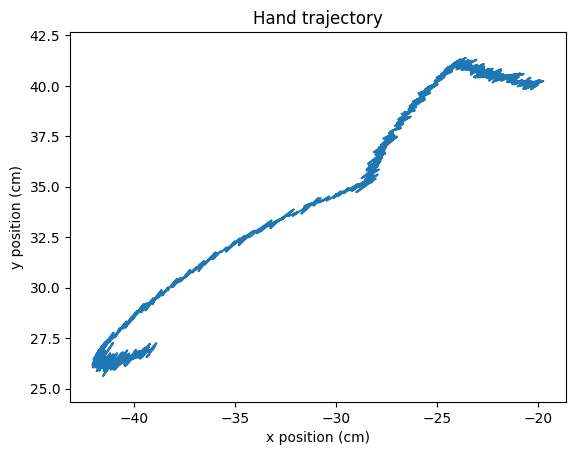

In [34]:
import matplotlib.pyplot as plt

#Code here
l = 25
n = S.shape[1]
X = np.zeros((n, 2))
for i in range(n):
    X[i, 0] = l * (np.cos(S[0, i]) + np.cos(S[0, i] + S[1, i]))
    X[i, 1] = l * (np.sin(S[0, i]) + np.sin(S[0, i] + S[1, i]))

plt.figure()
plt.plot(X[:, 0], X[:, 1])
plt.xlabel("x position (cm)")
plt.ylabel("y position (cm)")
plt.title("Hand trajectory")
plt.axis("equal")
plt.show()

In [32]:
print(S.shape)
print(S[:5, :5])

(2, 1000)
[[ 2.5021   2.4957   2.501    2.5068   2.4946 ]
 [-0.91973 -0.92324 -0.92466 -0.92817 -0.92155]]


What letter did the subject draw?


### The subject drew the letter 'M'